<a href="https://colab.research.google.com/github/IvanKatorgin/Miscellaneous/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('FPS_hw_x_df_x_taxi.xlsx')
df.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


Формирование выборок по классу поездки

In [ ]:
df_Economy=df[df['offer_class_group']=='Economy']
df_Comfort=df[df['offer_class_group']=='Comfort']
print('Выборки имеют одинаковую длину: ', len(df_Economy)==len(df_Comfort))

Выборки имеют одинаковую длину:  True


Визуализация доверительных интервалов

<ipython-input-5-edbcc58b1a2d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Economy['distance_km'], 50)
<ipython-input-5-edbcc58b1a2d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Comfort['distance_km'], 50)


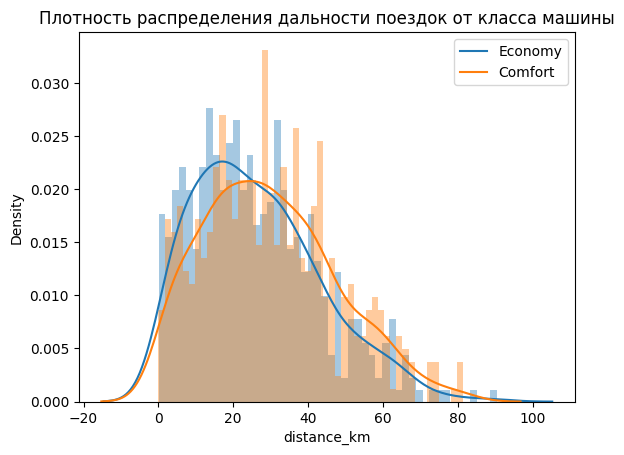

In [ ]:
sns.distplot(df_Economy['distance_km'], 50)
sns.distplot(df_Comfort['distance_km'], 50)
plt.title('Плотность распределения дальности поездок от класса машины')
plt.legend(['Economy', 'Comfort'])
plt.show()

Подключение библиотек статистических критериев и задание уровня значимости

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
alpha=0.05                            # уровень значимости

Проведение Т-Теста (t-критерий Стьюдента)

In [ ]:
result = ttest_ind(df_Economy['distance_km'], df_Comfort['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
     print('Отвергаем нулевую гипотезу')
else:
     print('Не отвергаем нулевую гипотезу')

p-value: 0.00156751
Отвергаем нулевую гипотезу


In [ ]:
# Дальность поездок Economy статистически отличается от дальности поездок Comfort

Проведение теста Манна-Уитни (U-критерий Манна-Уитни)

In [ ]:
result = mannwhitneyu(df_Economy['distance_km'], df_Comfort['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
     print('Отвергаем нулевую гипотезу')
else:
     print('Не отвергаем нулевую гипотезу')

p-value: 0.00128491
Отвергаем нулевую гипотезу


In [ ]:
# Дальность поездок Economy статистически отличается от дальности поездок Comfort

Выводы: Н0 не подтвердилась. Дальность поездок Economy статистически отличается от дальности поездок Comfort. Класс машины зависит от дальности поездок. На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе. Тип распределений - нормальный